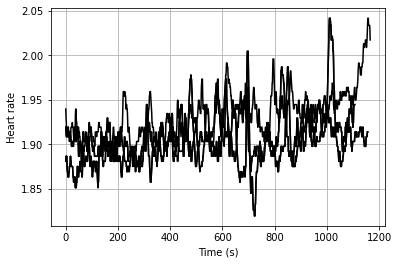

'\nX_Y_Spline = make_interp_spline(t, hb)\nX_ = np.linspace(t.min(), t.max(), 999999)\nY_ = X_Y_Spline(X_)\nplt.plot(X_, Y_)\n\nplt.grid()\nplt.xlabel("Time (s)")\nplt.ylabel("Heart rate")\nplt.show()\n'

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import math


hrt1 = pd.read_csv('tommi1.csv')
#plt.rcParams["figure.figsize"] = (13,6)
lol = [math.log10(x) for x in hrt1.HR ]
hbt1 = np.array( lol)
tt1 = np.array([i + 1 for i in range(len(hbt1))])
hrr1 = pd.read_csv('rocco1.csv')
#plt.rcParams["figure.figsize"] = (13,6)
hbr1 = np.array([math.log10(x) for x in hrr1.HR])
tr1 = np.array([i + 1 for i in range(len(hbr1))])

plt.plot(tr1,hbr1, 'black')
plt.plot(tt1,hbt1, 'black')

hrt2 = pd.read_csv('tommi2.csv')
#plt.rcParams["figure.figsize"] = (13,6)
hbt2 = np.array([math.log10(x) for x in hrt2.HR])
tt2 = np.array([i + 1 for i in range(len(hbt2))])

plt.plot(tt2,hbt2, 'black')

hrt3 = pd.read_csv('tommi3.csv')
#plt.rcParams["figure.figsize"] = (13,6)
hbt3 = np.array([math.log10(x) for x in hrt3.HR])
tt3 = np.array([i + 1 for i in range(len(hbt3))])
hrr3 = pd.read_csv('rocco3.csv')
#plt.rcParams["figure.figsize"] = (13,6)
hbr3 = np.array([math.log10(x) for x in hrr3.HR])
tr3 = np.array([i + 1 for i in range(len(hbr3))])

plt.plot(tr3,hbr3, 'black')
plt.plot(tt3,hbt3, 'black')

plt.grid()

plt.xlabel("Time (s)")
plt.ylabel("Heart rate")
plt.show()
'''
X_Y_Spline = make_interp_spline(t, hb)
X_ = np.linspace(t.min(), t.max(), 999999)
Y_ = X_Y_Spline(X_)
plt.plot(X_, Y_)

plt.grid()
plt.xlabel("Time (s)")
plt.ylabel("Heart rate")
plt.show()
'''

## Introduction

Thanks to a suggestion given by Professor P. Brutti, we realized that our dataset could be represented with sets of functions. By using Functional Data Analysis, we can study how the functions given by the heartbeat and the ones given by the evaluation position are varying through different games. We also wanted to apply regression to our functional linear models, in order to understand better the correlation and influence of the two variables with each other.

Goals of our analysis: 
- to study important sources of pattern and variation among the data 
- to explain variation in an outcome or dependent variable by using input or independent variable information
- to compare two or more sets of data with respect to certain types of variation, where two sets of data can contain different sets of replicates of the same functions, or different functions for a common set of replicates.


First step: data representation as a function

The function hb(t) is a function of time, and for each second there is a heartrate value associated, we can plot it just by interpolating of the values of time and heartrate.

The function pe(t) is a funciton of time, we have to smooth it in order to plot it, since there isn't a value of pos. evaluation for each second, but the evaluation changes every time a move is performed. Method for smoothing: B-spline

Let's start first with some simple statistics: the mean and standard deviation of functional data is the same for traditional data.

Mean: $ \bar{x}(t) = \frac{1}{N} \sum_{i=1}^{N} x_i(t) $

Standadar deviation: $ \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} [x_i(t)-\bar{x}(t)]^2} $

_da inserire i calcoli con i dati veri, sia per evaluation che hr_

Possibilità di fare cross-covariance and cross-correlation function (pag.42). If we have pairs of observed functions (xi, yi), the way in which these depend on one another can be quantified by the cross-covariance function or cross-correlation function. 3D plots here are an option.

Find some characteristic locations, and study their amplitude and width (pag45)

Step II: using a basis

In order to represent better the evaluation position function, we can use a basis function. 
Since our dataset doesn't represent periodic data, we decided to use the B-spline basis. We use linear combinations of basis function to represent our functions, in this way we can achieve smoothness. (pag55, 63) 


In [80]:
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from scipy.interpolate import make_interp_spline
import math

df = pd.read_csv('file_name.csv')
eva = np.array(df['evaluation'])

eval = []
for x in range(len(df['evaluation'])):
    if eva[x][0].isnumeric():
        eval.append(df['evaluation'][x])
    elif str(df['evaluation'][x])[1] =='+':
        # pick a good checkmate value
        eval.append(18.0)
    else:
        eval.append(-18.0)

t = df['real time']


plt.plot(t, eval, 'ro', label="evaluation p.")
plt.plot(t, eval, 'b', label="linear interpolation")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 



FileNotFoundError: [Errno 2] No such file or directory: 'file_name.csv'

In [81]:
# To represent B-spline interpolation, we need to provide required coefficients. We can take them by using the 'splrep' function. The 'splrep' function 
# returns t, c, k tuple containing  the vector of knots, the B-spline coefficients, and the degree of the spline.
tck = interpolate.splrep(t, eval, s=2, k=3) 


x_new = np.linspace(min(t), max(t), 10000)
y_fit = interpolate.BSpline(*tck)(x_new)
plt.title("BSpline curve fitting")
plt.plot(t, eval, 'ro', label="original")
#plt.plot(x_new, y_fit, '-c', label="B-spline")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 
 

TypeError: Lengths of the first three arguments (x,y,w) must be equal

In [82]:
# trying to import read_csv 

import FDApy
from FDApy.representation.functional_data import MultivariateFunctionalData
#from FDApy.misc.loader import read_csv
from FDApy.visualization.plot import plot
import numpy as np
import pandas as pd
import sktime
#from sktime.utils.data_io import load_from_tsfile_to_dataframe
from FDApy.representation.functional_data import (DenseFunctionalData,
                                                  IrregularFunctionalData, FunctionalData)




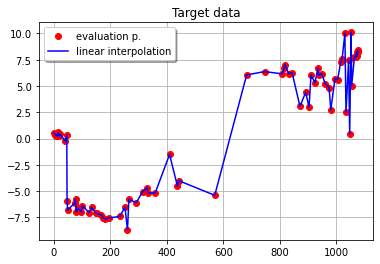

In [83]:
# B-spline smoothing
from scipy import interpolate
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from scipy.interpolate import make_interp_spline
import math

df = pd.read_csv('games/partita_0529-1/roccot01_vs_tommidim_2022.05.29.csv')
dic = {'Move':'tottime', 'TimeUsed':'eval', 'TotalTime':'timeused', 'Eval': 'move'}
eva = np.array(df['TimeUsed'])
t = np.array(df['Move'])
#print(df)

eval = [eva[0]]
te = [0]
for x in range(1, len(eva)):
    if eva[x] != eva[x-1]:
        eval.append(eva[x])
        te.append(t[x])
    


plt.plot(te, eval, 'ro', label="evaluation p.")
plt.plot(te, eval, 'b', label="linear interpolation")
plt.title("Target data")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

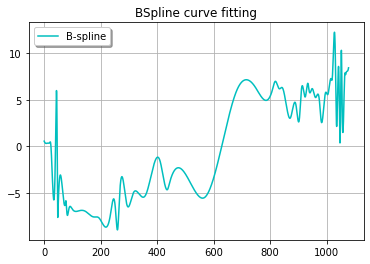

In [84]:
tck = interpolate.splrep(te, eval, s=1, k=3) 


x_new = np.linspace(min(te), max(te), 10000)
y_fit = interpolate.BSpline(*tck)(x_new)
plt.title("BSpline curve fitting")
#plt.plot(te, eval, 'ro', label="original")
plt.plot(x_new, y_fit, '-c', label="B-spline")
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid()
plt.show() 

In [ ]:
df = pd.read_csv('prova.csv')
print(df)


      Time        Game Player Statistics  Value
0        0  Game0814-2      w         HR   -1.0
1        1  Game0814-2      w         HR   -1.0
2        2  Game0814-2      w         HR    0.0
3        3  Game0814-2      w         HR    0.0
4        4  Game0814-2      w         HR    1.0
...    ...         ...    ...        ...    ...
4711   781  Game0813-1      b   TimeUsed  255.0
4712   782  Game0813-1      b   TimeUsed  255.0
4713   783  Game0813-1      b   TimeUsed  255.0
4714   784  Game0813-1      b   TimeUsed  255.0
4715   785  Game0813-1      b   TimeUsed  258.0

[83586 rows x 5 columns]


# Functional linear model 
Speaking of linear models, we can approach this topic with two different analysis: 
- one concerning how losing or winning a game influences the heart-rate, considering the heart-beat as our functional dependent variable
- the other one considering the evaluation position function as functional independent variable as well (possibly the covariate could be also functional)

In [88]:
realwage = pd.read_csv("prova.csv")
realwage = realwage.pivot_table(values='Value',
                                index='Time',
                                columns=['Game', 'Player', 'Statistics'])
#realwage
len(realwage)

1189